In [73]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [74]:
def did_end(p=0.01):
    return random.random() <= p

def gained_points(p=1/3):
    return random.random() <= p

In [75]:
def generate_rounds(end_prob, gain_prob):
    round_num, rounds = 30, []
    episode_limit = 300
    for r in range(round_num):
        reward, rnd = 0, []
        while(not did_end(end_prob) and len(rnd) < episode_limit):
            reward += 3 + random.randint(-2, 2)
            if(gained_points(gain_prob)):
                reward += 18
            rnd.append(reward)
        
        while(len(rnd) < episode_limit):
            if(len(rnd) == 0):
                rnd.append(0)
            rnd.append(rnd[-1])
        rounds.append(rnd)
    return rounds


In [80]:
def get_avg_perf(rounds):
    avg = []
    for rtn in range(len(rounds[0])):
        avg.append(0)
        for r in range(len(rounds)):
            avg[rtn] += rounds[r][rtn]

    for i in range(len(rounds[0])):
        avg[i] /= len(rounds)
    return avg

In [95]:
one_agent_rounds = generate_rounds(0.1, 0.38)
two_agent_rounds = generate_rounds(0.03, 0.49)
five_agent_rounds = generate_rounds(0.01, 0.46)
ten_agent_rounds = generate_rounds(0.009, 0.46)
twenty_agent_rounds = generate_rounds(0.008, 0.40)

one_agent_avg = get_avg_perf(one_agent_rounds)
two_agent_avg = get_avg_perf(two_agent_rounds)
five_agent_avg = get_avg_perf(five_agent_rounds)
ten_agent_avg = get_avg_perf(ten_agent_rounds)
twenty_agent_avg = get_avg_perf(twenty_agent_rounds)


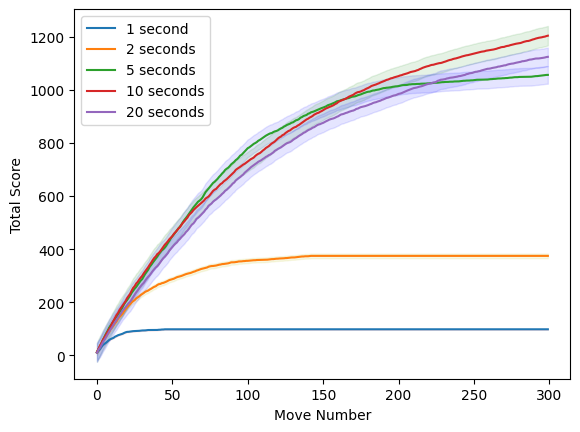

In [96]:
fig, ax = plt.subplots()

to_plot = [
    (one_agent_avg, 'r', "1 second"),
    (two_agent_avg, 'y', "2 seconds"),
    (five_agent_avg, 'b', "5 seconds"),
    (ten_agent_avg, 'g', "10 seconds"),
    (twenty_agent_avg, 'b', "20 seconds")
]

for res, col, name in to_plot:
    ci = 1.96 * np.std(res)/np.sqrt(len(res))
    plt.plot(res, label=name)
    ax.fill_between(range(len(res)), (res-ci), (res+ci), color=col, alpha=.1)

plt.xlabel("Move Number")
plt.ylabel("Total Score")
plt.legend()
plt.show()

909.6666666666666


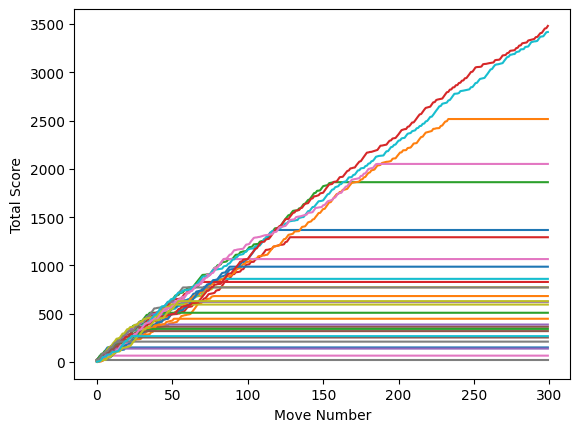

In [66]:
total = 0
for rnd in rounds:
    plt.plot(rnd)
    total += rnd[-1]

print(total/len(rounds))
plt.xlabel("Move Number")
plt.ylabel("Total Score")
plt.show()